# Control 4

Por **Daniela Opitz**. <dopitz@udd.cl>.

Actualizado: **11 de junio de 2024**.

### Mapa de Burbujas con la Encuesta Origen-Destino (50 pts):

- Utilice datos de la Encuesta Origen-Destino del archivo:

`viajes_persona_hogar.csv` y los datos geográficos de
`scl_zonas_urbanas.json`
- Cree al menos dos rangos etarios (por ejemplo, jóvenes y adultos mayores) y al menos dos tipos de propósito de viaje (por ejemplo, salud y ocio).
- Visualice la distribución geográfica de los viajes origen o destino o ambos según los
distintos modos de transporte a nivel de zona EOD.
- Interprete





## Preámbulo y Carga de Datos

In [1]:
try:
    import google.colab
    !curl -L -o Fira_Sans_Extra_Condensed.zip 'https://www.dropbox.com/s/82nuhtpybfpjeq9/Fira_Sans_Extra_Condensed.zip?dl=1'
    !unzip -o Fira_Sans_Extra_Condensed.zip
    import matplotlib as mpl
    mpl.font_manager.fontManager.addfont('Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Regular.ttf')
    #mpl.rc('font', family='Fira Sans Extra Condensed')
    !curl -L -O https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/miniaves.py
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   123    0   123    0     0    415      0 --:--:-- --:--:-- --:--:--   416
100   261    0   261    0     0    391      0 --:--:-- --:--:-- --:--:--     0
100   496    0   496    0     0    359      0 --:--:--  0:00:01 --:--:--     0
100 3733k  100 3733k    0     0  2093k      0  0:00:01  0:00:01 --:--:-- 2093k
Archive:  Fira_Sans_Extra_Condensed.zip
   creating: Fira_Sans_Extra_Condensed/
  inflating: __MACOSX/._Fira_Sans_Extra_Condensed  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Italic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-Italic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondense

In [2]:
!pip3 install KDEpy
!pip3 install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.4/553.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 53.5 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96
# esto depende de las fuentes que tengas instaladas en tu sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"
%config InlineBackend.figure_format = 'retina'

In [4]:
!pip install pymunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00


In [5]:
# Recarga modulos locales de Python cada vez que se modifican
%load_ext autoreload
%autoreload 2
from miniaves import figure_from_geodataframe, GeoFacetGrid, bubble_map, heat_map, dot_map, figure_grid_from_geodataframe

In [6]:
viajes_persona=pd.read_csv('https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/external/eod_stgo/output/viajes_persona_hogar.csv', sep=',')
viajes_persona

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,0,0,0,2,81067.0,1,120000,0,789356,76.810280
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,0,0,0,2,81067.0,1,120000,0,789356,76.810280
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,0,0,0,2,81067.0,1,120000,0,789356,76.810280
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,0,0,0,2,81067.0,1,120000,0,789356,76.810280
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,0,0,0,2,81067.0,1,120000,0,789356,76.810280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100329,743813,74381301,7438130102,1,97.0,97.0,5.0,5.0,235,244,...,0,0,0,1,NaN,0,80000,0,318005,68.410446
100330,743813,74381302,7438130201,1,97.0,97.0,5.0,5.0,244,235,...,0,0,0,1,NaN,0,80000,0,318005,68.410446
100331,743813,74381302,7438130202,1,97.0,97.0,5.0,5.0,235,244,...,0,0,0,1,NaN,0,80000,0,318005,68.410446
100332,743823,74382301,7438230101,1,97.0,97.0,5.0,5.0,235,235,...,0,1,0,1,NaN,0,80000,0,140007,231.671707


In [7]:
viajes_persona["PesoLaboral"] = viajes_persona["FactorLaboralNormal"] * viajes_persona["FactorPersona"]
viajes_persona["PesoLaboral"]

0         53.391740
1         53.391740
2         37.886589
3         52.214368
4         52.214368
            ...    
100329          NaN
100330          NaN
100331          NaN
100332          NaN
100333          NaN
Name: PesoLaboral, Length: 100334, dtype: float64

In [8]:
viajes_persona = viajes_persona[pd.notnull(viajes_persona["PesoLaboral"])]
viajes_persona

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,0,0,2,81067.0,1,120000,0,789356,76.810280,53.391740
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,0,0,2,81067.0,1,120000,0,789356,76.810280,53.391740
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,0,0,2,81067.0,1,120000,0,789356,76.810280,37.886589
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,0,0,2,81067.0,1,120000,0,789356,76.810280,52.214368
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,0,0,2,81067.0,1,120000,0,789356,76.810280,52.214368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99483,329271,32927104,3292710402,1,96.0,96.0,5.0,5.0,180,180,...,5,1,3,NaN,0,250000,0,750000,77.139656,56.321683
99484,329271,32927105,3292710501,1,96.0,95.0,5.0,5.0,180,643,...,5,1,3,NaN,0,250000,0,750000,77.139656,53.307439
99485,329271,32927105,3292710502,1,95.0,96.0,5.0,5.0,643,180,...,5,1,3,NaN,0,250000,0,750000,77.139656,53.307439
99916,359901,35990102,3599010201,1,335.0,70.0,5.0,4.0,627,6,...,0,0,5,NaN,0,107575,1,299472,205.824417,265.854887


In [9]:
viajes_persona.shape

(65591, 97)

In [13]:
num_viajes = len(viajes_persona)
total_peso_laboral = int(viajes_persona["PesoLaboral"].sum())

print(f"{num_viajes} viajes expandidos a {total_peso_laboral}")


65591 viajes expandidos a 9669230


In [14]:
viajes_persona[
    ["OrigenCoordX", "OrigenCoordY", "DestinoCoordX", "DestinoCoordY"]
].head()


,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY
0,335208.7188,6288387.0,338812.3125,6292391.0
1,338812.2813,6292391.0,335208.7188,6288387.0
2,338812.2813,6292391.0,343526.5938,6297299.0
3,343526.5938,6297299.0,345015.9063,6297331.0
4,345015.9063,6297331.0,338812.3125,6292391.0


Si bien las coordenadas están en formato numérico, no las tenemos estructuradas en un `GeoDataFrame`. Para ello, usaremos la función `to_point_geodataframe` para darle contexto geográfico a los datos.  Crearemos dos estructuras, una para los orígenes de los viajes y otra para los destinos. Del notebook anterior ya conocemos el sistema de coordenadas:

In [15]:
# Crear geometrías de puntos para origen y destino
origenes_viajes  = gpd.GeoDataFrame(viajes_persona, geometry=gpd.points_from_xy(viajes_persona.OrigenCoordX, viajes_persona.OrigenCoordY), crs="EPSG:32719")
destinos_viajes = gpd.GeoDataFrame(viajes_persona, geometry=gpd.points_from_xy(viajes_persona.DestinoCoordX, viajes_persona.DestinoCoordY), crs="EPSG:32719")


In [16]:
origenes_viajes.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,0,2,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (335208.719 6288387.000)
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,0,2,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (338812.281 6292391.000)
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,0,2,81067.0,1,120000,0,789356,76.81028,37.886589,POINT (338812.281 6292391.000)
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,0,2,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (343526.594 6297299.000)
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,0,2,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (345015.906 6297331.000)


In [17]:
destinos_viajes.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,0,2,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (338812.312 6292391.000)
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,0,2,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (335208.719 6288387.000)
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,0,2,81067.0,1,120000,0,789356,76.81028,37.886589,POINT (343526.594 6297299.000)
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,0,2,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (345015.906 6297331.000)
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,0,2,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (338812.312 6292391.000)


Cargamos el archivo GeoJSON con las zonas

In [20]:
zones = (
    gpd.read_file("https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/processed/scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(origenes_viajes.crs)
)
zones.head()


,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((346371.218 6285956.953, 346349.534 6..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((344415.434 6285878.048, 344548.462 6..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((342466.924 6284938.448, 342467.002 6..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((344391.421 6285910.048, 344365.314 6..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((345371.399 6286207.024, 345608.811 6..."


<Axes: >

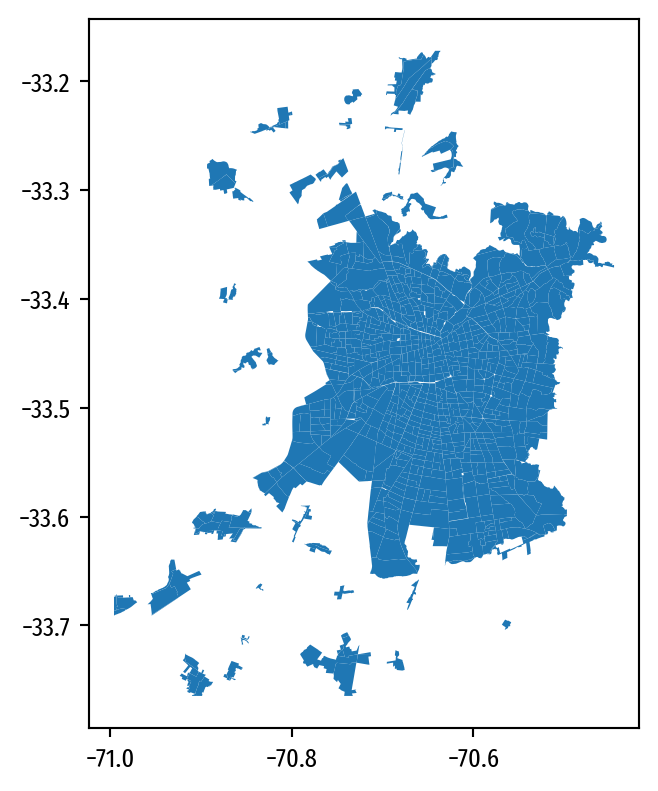

In [19]:
zones.plot()

In [21]:
zones.head()

,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((346371.218 6285956.953, 346349.534 6..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((344415.434 6285878.048, 344548.462 6..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((342466.924 6284938.448, 342467.002 6..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((344391.421 6285910.048, 344365.314 6..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((345371.399 6286207.024, 345608.811 6..."


Ahora nos aseguramos de tener orígenes y destinos que solo se dan dentro del contexto urbano determinado por el `GeoDataFrame` de `zonas`:

- Ocupamos sjoin que es el join spacial de GeoPandas https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html.
En una unión espacial, dos objetos geométricos se fusionan en función de su relación espacial entre sí.

In [22]:
# Filtrar orígenes y destinos dentro de las zonas urbanas
origenes_viajes_urban = gpd.sjoin(origenes_viajes, zones, how="inner", predicate="within")
destinos_viajes_urban = gpd.sjoin(destinos_viajes, zones, how="inner", predicate="within")

In [23]:
origenes_viajes_urban.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,NOM_REGION,PROVINCIA,NOM_PROVIN,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,MAIPÚ,MAIPÚ,CAPITAL COMUNAL,CIUDAD,0.359284,0.005556,958634.613588
19216,136571,13657103,1365710302,2,94.0,93.0,2.0,6.0,400,211,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,MAIPÚ,MAIPÚ,CAPITAL COMUNAL,CIUDAD,0.359284,0.005556,958634.613588
40941,173120,17312002,1731200204,1,94.0,94.0,2.0,2.0,400,386,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,MAIPÚ,MAIPÚ,CAPITAL COMUNAL,CIUDAD,0.359284,0.005556,958634.613588
41067,173393,17339303,1733930302,1,94.0,94.0,2.0,2.0,400,386,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,MAIPÚ,MAIPÚ,CAPITAL COMUNAL,CIUDAD,0.359284,0.005556,958634.613588
41259,173901,17390101,1739010101,1,94.0,94.0,2.0,2.0,400,410,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,MAIPÚ,MAIPÚ,CAPITAL COMUNAL,CIUDAD,0.359284,0.005556,958634.613588


In [24]:
origenes_viajes_urban.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Definición de rangos etarios

## Calculamos la edad, un grupo etarios y le asignamos una columna

In [25]:
# Calcula la edad de las personas
origenes_viajes["Edad"] = 2013 - origenes_viajes["AnoNac"]

# Agrupa a las personas en intervalos de 5 años
origenes_viajes["GrupoEtareo"] = origenes_viajes["Edad"] - (origenes_viajes["Edad"] % 5)

# Muestra las primeras filas del DataFrame para verificar los cambios

origenes_viajes.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry,Edad,GrupoEtareo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (335208.719 6288387.000),41,40
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,81067.0,1,120000,0,789356,76.81028,53.391740,POINT (338812.281 6292391.000),41,40
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,81067.0,1,120000,0,789356,76.81028,37.886589,POINT (338812.281 6292391.000),24,20
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (343526.594 6297299.000),24,20
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,81067.0,1,120000,0,789356,76.81028,52.214368,POINT (345015.906 6297331.000),24,20


### Filtramos por grupo etario


In [27]:
grupos_elegidos=[20,40]

In [30]:
viajes_filtered=origenes_viajes[origenes_viajes['GrupoEtareo'].isin(grupos_elegidos)]
viajes_filtered

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry,Edad,GrupoEtareo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,81067.0,1,120000,0,789356,76.810280,53.391740,POINT (335208.719 6288387.000),41,40
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,81067.0,1,120000,0,789356,76.810280,53.391740,POINT (338812.281 6292391.000),41,40
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,81067.0,1,120000,0,789356,76.810280,37.886589,POINT (338812.281 6292391.000),24,20
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,81067.0,1,120000,0,789356,76.810280,52.214368,POINT (343526.594 6297299.000),24,20
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,81067.0,1,120000,0,789356,76.810280,52.214368,POINT (345015.906 6297331.000),24,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99471,329001,32900106,3290010603,1,96.0,70.0,5.0,4.0,187,23,...,NaN,0,350000,0,552522,132.308258,230.592529,POINT (346016.281 6289058.000),23,20
99476,329271,32927101,3292710101,1,96.0,0.0,5.0,0.0,180,0,...,NaN,0,250000,0,750000,77.139656,56.625455,POINT (344872.656 6287845.000),40,40
99477,329271,32927101,3292710102,1,0.0,96.0,0.0,5.0,0,180,...,NaN,0,250000,0,750000,77.139656,56.625455,POINT (0.000 0.000),40,40
99478,329271,32927102,3292710201,1,96.0,92.0,5.0,3.0,180,281,...,NaN,0,250000,0,750000,77.139656,46.409557,POINT (344872.656 6287845.000),41,40


In [32]:
viajes_filtered_jovenes=viajes_filtered[viajes_filtered['GrupoEtareo']==20]
viajes_filtered_jovenes

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry,Edad,GrupoEtareo
2,173431,17343101,1734310101,2,94.0,328.0,2.0,2.0,407,126,...,81067.0,1,120000,0,789356,76.810280,37.886589,POINT (338812.281 6292391.000),24,20
3,173431,17343101,1734310102,1,328.0,70.0,2.0,4.0,126,15,...,81067.0,1,120000,0,789356,76.810280,52.214368,POINT (343526.594 6297299.000),24,20
4,173431,17343101,1734310103,2,70.0,94.0,4.0,2.0,15,407,...,81067.0,1,120000,0,789356,76.810280,52.214368,POINT (345015.906 6297331.000),24,20
5,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,...,57000.0,0,140000,0,633883,76.810280,52.214368,POINT (338536.438 6291928.000),22,20
6,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,...,57000.0,0,140000,0,633883,76.810280,52.214368,POINT (354267.344 6302297.000),22,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99451,328981,32898105,3289810501,1,96.0,70.0,5.0,4.0,185,29,...,NaN,0,200000,0,560000,66.865501,56.443798,POINT (345691.375 6289118.000),20,20
99452,328981,32898105,3289810502,1,70.0,96.0,4.0,5.0,29,185,...,NaN,0,200000,0,560000,66.865501,44.792527,POINT (346685.688 6294759.000),20,20
99469,329001,32900106,3290010601,1,96.0,70.0,5.0,4.0,187,7,...,NaN,0,350000,0,552522,132.308258,127.253780,POINT (346016.281 6289058.000),23,20
99470,329001,32900106,3290010602,1,70.0,96.0,4.0,5.0,7,187,...,NaN,0,350000,0,552522,132.308258,175.378038,POINT (344866.594 6297777.000),23,20


In [34]:
viajes_filtered_jovenes['Proposito'].value_counts()

Proposito
Volver a casa                   2942
Al estudio                      1284
Al trabajo                      1144
De compras                       177
Visitar a alguien                158
Por estudio                      152
Trámites                         125
Buscar o dejar a alguien         114
Recreación                       113
Otra actividad (especifique)      67
De salud                          54
Por trabajo                       48
Comer o tomar algo                27
Buscar o dejar algo               13
Name: count, dtype: int64

# GeoFacetGrid

In [35]:
grid = GeoFacetGrid(
    #los datos
    viajes_filtered_jovenes,
    #las zonas o el contexto
    context=zones,
    #la variable que mapearemos a las filas del gráfico
    row="Proposito",
    # en este caso, dos filas
    row_order=["Al estudio", "De compras"],

    #la variable que mapeamos en las columnas
    col="ModoDifusion",
    # solo veremos estas categorías
    col_order=["Auto", "Bip!", "Caminata", "Bicicleta"],

    # el canal de codificación tono (hue) expresará la columna categórica ModoDifusion
    hue="ModoDifusion",
    palette="plasma",
    # la altura del gráfico
    height=9
)

grid.add_layer(zones, color="#efefef", edgecolor="white", linewidth=1)
grid.add_layer(bubble_map, size="PesoLaboral", scale=0.15, edgecolor="black", alpha=0.5)


Output hidden; open in https://colab.research.google.com to view.

**Interpretación**: observamos que la mayoría de los jovenes va a estudiar en transporte público, seguido de en automovil. Los viajes de estudio en modo automovil se concentran en la zona oriente de la ciudad mientras que los de transporte público se distribuyen de manera más unfirme en la ciudad. hay un pequeño grupo tambien que va a estudiar en bicicleta, estos viajes se concentran principalemente en la parte central de la ciudad. El modo caminata no es muy comun para ir a estudiar. Con respecto al proposito De compras notamos que estos viajes son menos comunes que los viajes de estudio y que el modo Bicicleta es el menos usado para este fin.

In [36]:
viajes_filtered_adultos=viajes_filtered[viajes_filtered['GrupoEtareo']==40]
viajes_filtered_adultos

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry,Edad,GrupoEtareo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,81067.0,1,120000,0,789356,76.810280,53.391740,POINT (335208.719 6288387.000),41,40
1,173431,17343102,1734310201,1,94.0,94.0,2.0,2.0,407,400,...,81067.0,1,120000,0,789356,76.810280,53.391740,POINT (338812.281 6292391.000),41,40
25,173471,17347101,1734710101,2,94.0,70.0,2.0,4.0,398,7,...,NaN,0,240000,0,1233727,64.768684,34.770116,POINT (334308.594 6292562.000),42,40
26,173471,17347101,1734710102,2,70.0,94.0,4.0,2.0,7,398,...,NaN,0,240000,0,1233727,64.768684,35.093126,POINT (344866.594 6297777.000),42,40
85,100200,10020001,1002000101,1,103.0,103.0,7.0,7.0,785,786,...,NaN,0,170000,0,274156,110.427055,61.922225,POINT (338713.094 6265343.000),44,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,328990,32899002,3289900202,1,70.0,96.0,4.0,5.0,48,185,...,NaN,0,222989,1,842183,41.810265,13.266239,POINT (346590.250 6298257.000),44,40
99476,329271,32927101,3292710101,1,96.0,0.0,5.0,0.0,180,0,...,NaN,0,250000,0,750000,77.139656,56.625455,POINT (344872.656 6287845.000),40,40
99477,329271,32927101,3292710102,1,0.0,96.0,0.0,5.0,0,180,...,NaN,0,250000,0,750000,77.139656,56.625455,POINT (0.000 0.000),40,40
99478,329271,32927102,3292710201,1,96.0,92.0,5.0,3.0,180,281,...,NaN,0,250000,0,750000,77.139656,46.409557,POINT (344872.656 6287845.000),41,40


In [37]:
grid = GeoFacetGrid(
    #los datos
    viajes_filtered_adultos,
    #las zonas o el contexto
    context=zones,
    #la variable que mapearemos a las filas del gráfico
    row="Proposito",
    # en este caso, dos filas
    row_order=["Al estudio", "De compras"],

    #la variable que mapeamos en las columnas
    col="ModoDifusion",
    # solo veremos estas categorías
    col_order=["Auto", "Bip!", "Caminata", "Bicicleta"],

    # el canal de codificación tono (hue) expresará la columna categórica ModoDifusion
    hue="ModoDifusion",
    palette="plasma",
    # la altura del gráfico
    height=9
)

grid.add_layer(zones, color="#efefef", edgecolor="white", linewidth=1)
grid.add_layer(bubble_map, size="PesoLaboral", scale=0.15, edgecolor="black", alpha=0.5)

Output hidden; open in https://colab.research.google.com to view.

**Interpretacion**: notamos que los viajes de estudio en adultos jovenes no son muy comunes, que es lo esperado. Con respecto al proposito de Compras se observa que el modo auto y caminata son los viajes más comunes y los modos de transporte público tienen una frecuencia menor. En particular se destaca que los adultos jovenes salen muy poco a comprar en bicicleta, privilegiando el automovil y el modo caminata.